
**Dataset**: https://www.kaggle.com/datasets/ethancratchley/email-phishing-dataset

Loading The Dataset

In [25]:
import pandas as pd

In [26]:
dataset = pd.read_csv("email_phishing_data.csv")
dataset

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
524841,782,327,301,2,2,2,52,1,0
524842,36,30,11,0,0,0,4,0,1
524843,61,46,11,0,0,0,3,0,0
524844,213,136,89,0,0,0,18,0,0


# Explorando os dados

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Descrição dos dados:

In [41]:
pd.set_option('display.float_format', '{:.2f}'.format)
dataset.describe()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,524845.00,524845.00,524845.00,524845.00,524845.00,524845.00,524845.00,524845.00,524845.00
mean,271.77,122.91,78.67,0.90,0.35,2.11,24.33,0.25,0.01
std,835.32,188.87,242.02,5.60,1.77,13.59,167.56,0.56,0.11
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.00,38.00,12.00,0.00,0.00,0.00,2.00,0.00,0.00
50%,120.00,79.00,34.00,0.00,0.00,0.00,8.00,0.00,0.00
75%,269.00,145.00,79.00,0.00,0.00,1.00,22.00,0.00,0.00
max,103407.00,13986.00,18904.00,824.00,524.00,1150.00,77167.00,6.00,1.00


Como é possível observar pelo valor de max, existe um outlier com um número muito grande de palavras (mais de 2 milhões), que não faz sentido no contexto analisado. Vejamos a seguir os 10 emails com mais palavras para fazer uma comparação:

In [42]:
dataset['num_words'].sort_values(ascending=False).head(10)

111750    103407
357879    101796
316618     63501
316072     55145
316615     49961
316164     46124
316178     45654
254930     42844
74046      41250
54780      41250
Name: num_words, dtype: int64

Mesmo o segundo email com mais palavras tem uma diferença muito grande com relação ao primeiro, o que indica que este é, muito provavelmente, um erro. Logo, vamos excluí-lo do conjunto de dados para que o modelo não seja prejudicado:

In [43]:
idx_max  = dataset['num_words'].idxmax()
dataset = dataset.drop(index=idx_max)

Agora, temos o seguinte:

In [45]:
dataset.describe()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,524844.00,524844.00,524844.00,524844.00,524844.00,524844.00,524844.00,524844.00,524844.00
mean,271.57,122.91,78.67,0.90,0.35,2.11,24.19,0.25,0.01
std,823.10,188.87,242.02,5.60,1.77,13.59,129.37,0.56,0.11
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.00,38.00,12.00,0.00,0.00,0.00,2.00,0.00,0.00
50%,120.00,79.00,34.00,0.00,0.00,0.00,8.00,0.00,0.00
75%,269.00,145.00,79.00,0.00,0.00,1.00,22.00,0.00,0.00
max,101796.00,13986.00,18904.00,824.00,524.00,1150.00,69007.00,6.00,1.00


## Tipos de dados:

In [32]:
dataset.dtypes

num_words              int64
num_unique_words       int64
num_stopwords          int64
num_links              int64
num_unique_domains     int64
num_email_addresses    int64
num_spelling_errors    int64
num_urgent_keywords    int64
label                  int64
dtype: object

O fato de serem todos atributos numéricos facilita a análise e construção dos modelos, já que não será necessário converter atributos categóricos para numéricos.

## Verificação de desbalanceamento

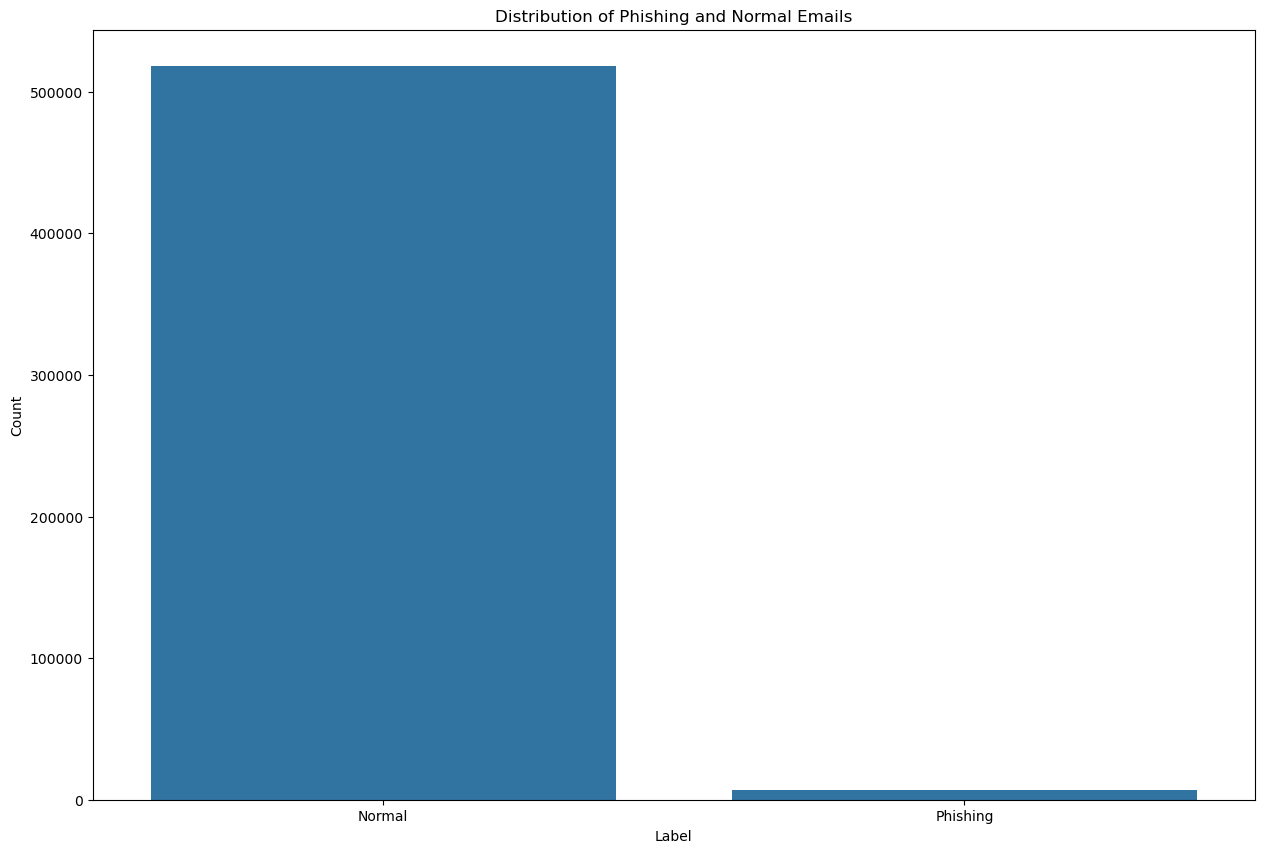

In [33]:
plt.figure(figsize=(15, 10))

sns.countplot(x='label', data=dataset)
plt.title('Distribution of Phishing and Normal Emails')

plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Phishing'])
plt.show()

In [34]:
counts = dataset['label'].value_counts()
print(f"Emails normais: {counts[0]}")
print(f"Emails de phishing: {counts[1]}")
print(dataset['label'].value_counts(normalize=True) * 100)

Emails normais: 517896
Emails de phishing: 6949
label
0   98.68
1    1.32
Name: proportion, dtype: float64


Percebe-se que os dados estão bastante desbalanceados, com apenas pouco mais de 1% pertencendo à classe "Phishing". Para que os modelos possam ser treinados corretamente, devemos balancear esses dados, o que pode ser feito tanto por undersampling (reduzindo a classe majoritária) ou oversampling (aumentando a classe minoritária). No nosso caso, escolheremos o método de undersampling para o overfitting de dados que seria causada pelo oversampling.

Emails normais: 517896
Emails de phishing: 6949


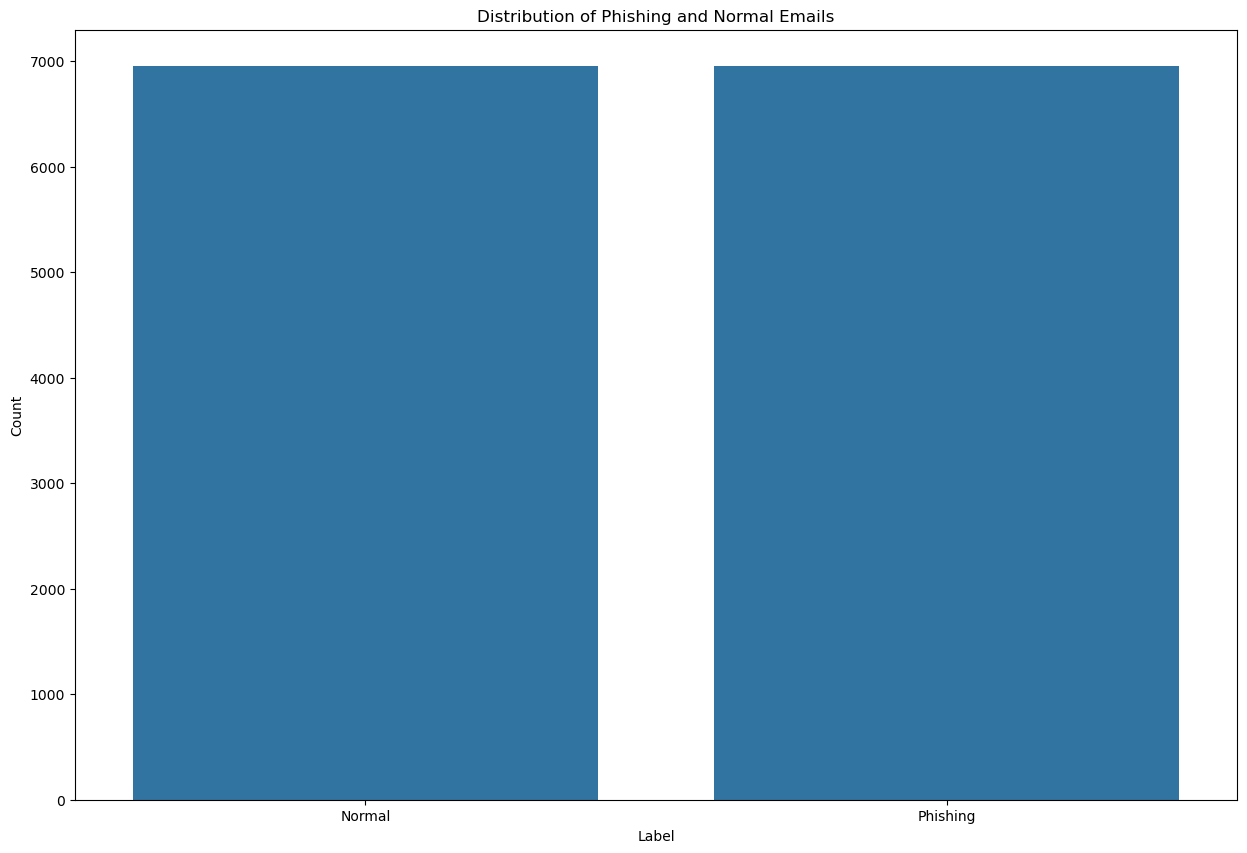

In [35]:
normal_emails = dataset[dataset['label'] == 0]
phishing_emails = dataset[dataset['label'] == 1]
print(f"Emails normais: {len(normal_emails)}")
print(f"Emails de phishing: {len(phishing_emails)}")

# balancea os dois conjuntos
normal_emails_balanced = normal_emails.sample(len(phishing_emails), random_state=42)

# Junta os conjuntos balanceados e embaralha os valores 
balanced_dataset = pd.concat([normal_emails_balanced, phishing_emails]).sample(frac=1, random_state=42).reset_index(drop=True)

plt.figure(figsize=(15, 10))
sns.countplot(x='label', data=balanced_dataset)
plt.title('Distribution of Phishing and Normal Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Phishing'])
plt.show()

# Testando métodos

In [36]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [37]:
# Define o k-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Split de dados de treino e teste
# 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(balanced_dataset.drop(columns=['label']), balanced_dataset['label'], test_size=0.2, random_state=42)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

scores = cross_val_score(knn_pipeline, X_train, y_train, cv=cv, scoring='f1')
print(f'KNN F1 Score (média): {scores.mean():.4f}')

KNN F1 Score (média): 0.7492


In [39]:
from sklearn.linear_model import LogisticRegression

logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

scores = cross_val_score(logreg_pipeline, X_train, y_train, cv=cv, scoring='f1')
print(f'Logistic Regression F1 Score (média): {scores.mean():.4f}')


Logistic Regression F1 Score (média): 0.6875


In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='f1')

print(f'Random Forest F1 Score (média): {scores.mean():.4f}')

Random Forest F1 Score (média): 0.7836
